In [31]:
import pandas as pd
import numpy as np

In [106]:
shop_info=pd.read_csv('../dataset/shop_info.txt',header=None)
shop_col=['shop_id', 'city_name', 'location', 'per_pay', 'score', 'cmt_cnt', 'shop_lvl', 'cate_1', 'cate_2', 'cate_3']
shop_info.columns=shop_col
shop_info.head()

,shop_id,city_name,location,per_pay,score,cmt_cnt,shop_lvl,cate_1,cate_2,cate_3
0,1,湖州,885,8,4.0,12.0,2,美食,休闲茶饮,饮品/甜点
1,2,哈尔滨,64,19,NaN,NaN,1,超市便利店,超市,NaN
2,3,南昌,774,5,3.0,2.0,0,美食,休闲茶饮,奶茶
3,4,天津,380,18,NaN,NaN,1,超市便利店,超市,NaN
4,5,杭州,263,2,2.0,2.0,0,美食,休闲食品,生鲜水果


In [2]:
data_col=['user_id','shop_id','time_stamp']

In [3]:
data_pay=pd.read_csv('../dataset/user_pay.txt',header=None)

data_pay.columns=data_col

In [19]:
data_pay.tail()

,user_id,shop_id,time_stamp,date
69674105,15330495,766,2016-08-21 19:00:00,2016-08-21
69674106,8556331,766,2016-08-11 20:00:00,2016-08-11
69674107,11429329,766,2016-09-18 18:00:00,2016-09-18
69674108,11429329,766,2016-10-02 20:00:00,2016-10-02
69674109,22602094,766,2016-10-13 13:00:00,2016-10-13


In [5]:
data_pay.time_stamp=pd.to_datetime(data_pay.time_stamp, format='%Y/%m/%d %H:%M:%S')


In [6]:
data_pay['date'] = data_pay.time_stamp.dt.date
data_pay.head()

,user_id,shop_id,time_stamp,date
0,22127870,1862,2015-12-25 17:00:00,2015-12-25
1,3434231,1862,2016-10-05 11:00:00,2016-10-05
2,16955285,1862,2016-02-10 15:00:00,2016-02-10
3,13799128,1862,2016-01-13 14:00:00,2016-01-13
4,13799128,1862,2016-07-05 12:00:00,2016-07-05


In [58]:
shop_pay_day=pd.DataFrame({'payday': data_pay.groupby(['shop_id', 'date'])['user_id'].count()}).reset_index()

In [59]:
shop_pay_day=shop_pay_day.pivot(index='shop_id',columns='date',values='payday').reset_index()
shop_pay_day.head()

date,shop_id,2015-06-26,2015-06-27,2015-06-28,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-04,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202.0,243.0,216.0,255.0,172.0,226.0,257.0,251.0,281.0,180.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,155.0,143.0,78.0,82.0,97.0,83.0,96.0,96.0,115.0,80.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,127.0,125.0,47.0,80.0,61.0,68.0,103.0,102.0,104.0,67.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,221.0,81.0,90.0,104.0,55.0,110.0,215.0,196.0,115.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,161.0,240.0,454.0,302.0,1.0,NaN,215.0,203.0,291.0,239.0


In [60]:
shop_pay_day.drop(shop_pay_day.columns[[1,2,3,4,5]], axis=1, inplace=True)

In [104]:
import matplotlib.pyplot as plt
tmp = shop_pay_day.copy()
# tmp=tmp.fillna(0)
tmp.head()


date,shop_id,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202.0,243.0,216.0,255.0,172.0,226.0,257.0,251.0,281.0,180.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,155.0,143.0,78.0,82.0,97.0,83.0,96.0,96.0,115.0,80.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,127.0,125.0,47.0,80.0,61.0,68.0,103.0,102.0,104.0,67.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,221.0,81.0,90.0,104.0,55.0,110.0,215.0,196.0,115.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,161.0,240.0,454.0,302.0,1.0,NaN,215.0,203.0,291.0,239.0


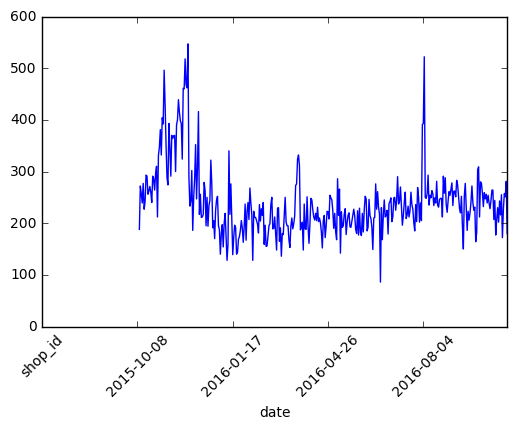

In [105]:
tmp.iloc[0].plot()
plt.xticks(rotation=45)
plt.show()

In [107]:
# tmp = shop_pay_day.copy()
# tmp.merge(shop_info, on='shop_id')


date,shop_id,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-10-31,city_name,location,per_pay,score,cmt_cnt,shop_lvl,cate_1,cate_2,cate_3
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,180.0,湖州,885,8,4.0,12.0,2,美食,休闲茶饮,饮品/甜点
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.0,哈尔滨,64,19,NaN,NaN,1,超市便利店,超市,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.0,南昌,774,5,3.0,2.0,0,美食,休闲茶饮,奶茶
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,115.0,天津,380,18,NaN,NaN,1,超市便利店,超市,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,239.0,杭州,263,2,2.0,2.0,0,美食,休闲食品,生鲜水果
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.0,大连,1139,13,3.0,1.0,0,美食,烘焙糕点,面包
6,7,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,...,81.0,绍兴,145,13,3.0,9.0,2,美食,快餐,西式快餐
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.0,杭州,234,16,3.0,1.0,0,美食,休闲食品,生鲜水果
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,212.0,杭州,1120,15,4.0,0.0,1,超市便利店,超市,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,孝感,98,10,NaN,NaN,0,超市便利店,超市,NaN


In [109]:
shop_pay_day.to_csv('../tempfile/shop_pay_everyday.csv', index=False, header=False)